基于dataset\training_set数据，根据提供的结构，建立CNN模型，识别图片中的猫/狗，计算预测准确率：
1.识别图片中的猫/狗、计算dataset\test_set测试数据预测准确率
2.从网站下载猫/狗图片，对其进行预测

In [1]:
#load the data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('./dataset/training_set',target_size=(50,50),batch_size=32,class_mode='binary')

Found 8000 images belonging to 2 classes.


In [2]:
# set up the cnn model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
# 卷积层
model.add(Conv2D(32,(3,3),input_shape=(50,50,3),activation='relu'))
# 池化层
model.add(MaxPool2D(pool_size=(2,2)))
# 卷积层
model.add(Conv2D(32,(3,3),activation='relu'))
# 池化层
model.add(MaxPool2D(pool_size=(2,2)))
# flattening layer
model.add(Flatten())
# FC layer
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [3]:
# configure the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 128)               4

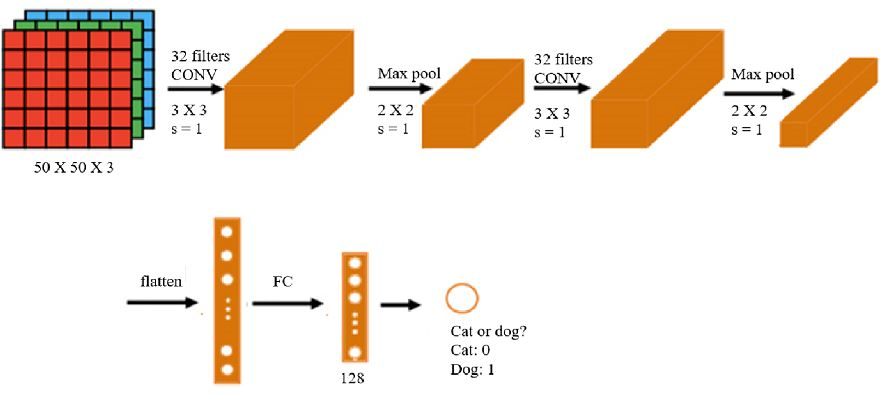

In [5]:
# train the model
model.fit_generator(training_set,epochs=20)

D:\temp\ipykernel_11240\167721954.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(training_set,epochs=20)


Epoch 1/20
250/250 [==============================] - 82s 320ms/step - loss: 0.6542 - accuracy: 0.6065
Epoch 2/20
250/250 [==============================] - 20s 79ms/step - loss: 0.5629 - accuracy: 0.7106
Epoch 3/20
250/250 [==============================] - 20s 81ms/step - loss: 0.5204 - accuracy: 0.7384
Epoch 4/20
250/250 [==============================] - 21s 83ms/step - loss: 0.4860 - accuracy: 0.7665
Epoch 5/20
250/250 [==============================] - 21s 85ms/step - loss: 0.4501 - accuracy: 0.7862
Epoch 6/20
250/250 [==============================] - 21s 84ms/step - loss: 0.4180 - accuracy: 0.8059
Epoch 7/20
250/250 [==============================] - 21s 83ms/step - loss: 0.3885 - accuracy: 0.8238
Epoch 8/20
250/250 [==============================] - 20s 82ms/step - loss: 0.3481 - accuracy: 0.8474
Epoch 9/20
250/250 [==============================] - 21s 85ms/step - loss: 0.3149 - accuracy: 0.8599
Epoch 10/20
250/250 [==============================] - 22s 87ms/step - loss: 0.28

In [6]:
# accuracy on the training data
accuracy_train = model.evaluate_generator(training_set)
print(accuracy_train)

D:\temp\ipykernel_11240\2929107028.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_train = model.evaluate_generator(training_set)


[0.007038746494799852, 0.999875009059906]


In [7]:
# accuracy on the test data
test_set = train_datagen.flow_from_directory('./dataset/test_set',target_size=(50,50),batch_size=32,class_mode='binary')

accuracy_test = model.evaluate_generator(test_set)
print(accuracy_test)

Found 2000 images belonging to 2 classes.


D:\temp\ipykernel_11240\877899612.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_test = model.evaluate_generator(test_set)


[1.1828299760818481, 0.7684999704360962]


In [28]:
# load single image
# from keras.preprocessing.image import img_to_array
from keras.utils import image_utils
pic_dog = 'dog.jpg'
pic_dog = image_utils.load_img(pic_dog,target_size=(50,50))
pic_dog = img_to_array(pic_dog)
pic_dog = pic_dog/255
pic_dog = pic_dog.reshape(1,50,50,3)
# result = model.predict_classes(pic_dog)
result = (model.predict(pic_dog) > 0.5).astype("int32")
print(result)

1/1 [==============================] - 0s 20ms/step
[[1]]


In [16]:
pic_cat = 'cat1.jpg'
pic_cat = image_utils.load_img(pic_cat,target_size=(50,50))
pic_cat = img_to_array(pic_cat)
pic_cat = pic_cat/255
pic_cat = pic_cat.reshape(1,50,50,3)
result = (model.predict(pic_cat) > 0.5).astype("int32")
print(result)

1/1 [==============================] - 0s 16ms/step
[[0]]


In [11]:
import keras
print(keras.__version__)

2.9.0


In [17]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

1/1 [==============================] - 0s 17ms/step


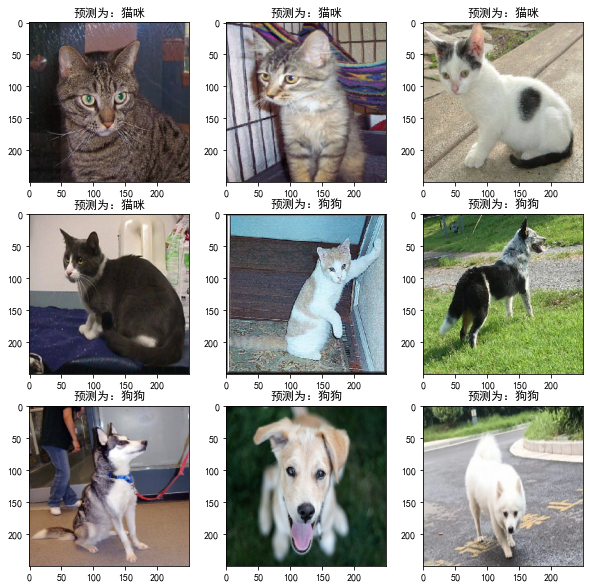

In [27]:
# make prediction on multiple images
import matplotlib as mlp
font2 = {'family' : 'SimHei',
'weight' : 'normal',
'size'   : 20,
}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.utils import image_utils
# , img_to_array
from keras.models import load_model
a = [i for i in range(1,10)]
fig = plt.figure(figsize=(10,10))
for i in a:
    img_name = str(i)+'.jpg'
    img_ori = image_utils.load_img(img_name, target_size=(50, 50))
    img = img_to_array(img_ori)
    img = img.astype('float32')/255
    img = img.reshape(1,50,50,3)
    result = (model.predict(img) > 0.5).astype("int32")
    img_ori = image_utils.load_img(img_name, target_size=(250, 250))
    plt.subplot(3,3,i)
    plt.imshow(img_ori)
    plt.title('预测为：狗狗' if result[0][0] == 1 else '预测为：猫咪')
plt.show()

CNN实现猫狗识别实战summary：<br>
1、通过搭建CNN模型，实现了对复杂图像的自动识别分类；<br>
2、掌握了图像数据的批量加载与图像增强方法；<br>
3、更熟练的掌握了keras的sequence结构，并嵌入卷积、池化层；<br>
4、实现了对网络图片的分类识别<br>
5、图像预处理参考资料：https://keras.io/preprocessing/image/